## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

**Nome:** João Pedro da Silva Lima

Aparentemente a população votante na plataforma tem uma tendência a gostar dos filmes, uma vez que os dados das notas médias seguem uma distribuição aproximadamente normal assimétrica à esquerda. 

Os gêneros mais votados são também os que possuem o maior, número de filmes lançados, uma vez que o número de votos por filme em cada gênero é aproximadamente constante, portanto mais votos não implica necessáriamente em maior popularidade do gênero, apenas em mais filmes cadastrados.

Pode-se também perceber uma relação positiva forte entre nota média e número de votos, ou seja, filmes mais aclamados pela comunidade também são mais votados por ela, enquanto filmes com menos votos tem distribuições maiores de notas.


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução

## Carregando os filmes 
filmes = pd.read_csv( 'movies.csv' )

## Renomeando as colunas
filmes.columns = ['filmeId','titulo','generos']

## Setando o index como o filme
filmes.set_index( keys = 'filmeId', inplace = True ) 

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv( 'ratings.csv' )

notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução

## Primeiro, criaremos um objeto auxiliar groupby onde agruparemos os dados das notas por filme
notas_por_filme = notas.groupby( 'filmeId' )

## Então, vamos calcular as médias por filme
medias_por_filme = notas_por_filme.mean()['nota']

## Adicionar coluna ao dataframe Filmes
filmes['nota_media'] = medias_por_filme

In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme

## Cada linha representa um voto a um filme
## Contagem de linhas:
quantidade_notas_por_filme = notas_por_filme.count()['usuarioId']


In [12]:
# solução para criar a nova coluna e filtrar os filmes


## Adicionar a coluna quantidade_de_notas no dataframe filme
filmes['total_de_votos'] = quantidade_notas_por_filme

## Remover os que possuem menos ou 49 votos
filmes = filmes.query( 'total_de_votos >= 50' )
filmes['total_de_votos'].min()

50.0

In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Nota Média')

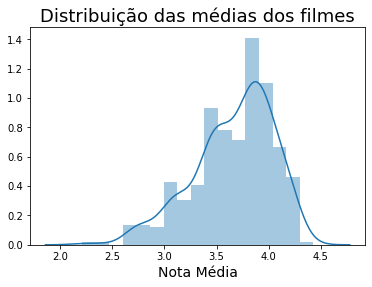

In [14]:
# solução histograma
ax = sns.distplot( filmes['nota_media'] )
ax.set_title( 'Distribuição das médias dos filmes', fontsize = 18 )
ax.set_xlabel('Nota Média', fontsize = 14)

Text(0.5, 0, 'Nota Média')

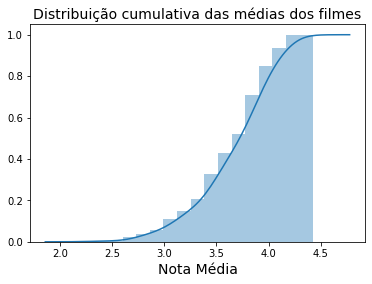

In [15]:
# solução cumulativa

ax = sns.distplot( filmes['nota_media'], hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True} )
ax.set_title( 'Distribuição cumulativa das médias dos filmes', fontsize = 14 )
ax.set_xlabel('Nota Média', fontsize = 14)


## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Total de votos')

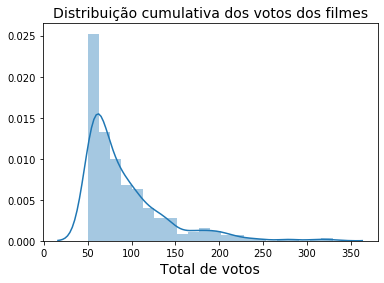

In [16]:
# solução histograma
ax = sns.distplot( filmes['total_de_votos'] )
ax.set_title( 'Distribuição cumulativa dos votos dos filmes', fontsize = 14 )
ax.set_xlabel('Total de votos', fontsize = 14)

Text(0.5, 0, 'Total de votos')

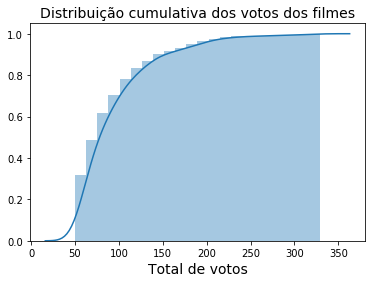

In [17]:
# solução cumulativa
ax = sns.distplot( filmes['total_de_votos'], hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True} )
ax.set_title( 'Distribuição cumulativa dos votos dos filmes', fontsize = 14 )
ax.set_xlabel('Total de votos', fontsize = 14)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução

nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Quantidade de filmes por gênero')

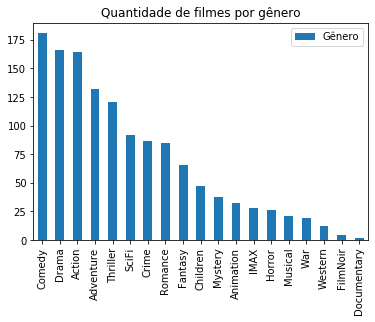

In [22]:
# solução

## Filmes mais
generos_ordenados = generos.sum().sort_values(ascending = False)

ax = pd.DataFrame( generos_ordenados, columns = ['Gênero'] ).plot.bar()
ax.set_title( 'Quantidade de filmes por gênero' )

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
top5_generos_em_quantidade_de_filmes = generos_ordenados[0:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
soma_das_categorias = votos_por_genero_por_filme.sum()
soma_das_categorias

Action         15734.0
Adventure      13117.0
Animation       3066.0
Children        4331.0
Comedy         15330.0
Crime           8649.0
Documentary      108.0
Drama          15445.0
Fantasy         5993.0
FilmNoir         291.0
Horror          2215.0
IMAX            2492.0
Musical         1822.0
Mystery         3452.0
Romance         7444.0
SciFi           8989.0
Thriller       11907.0
War             2113.0
Western          900.0
dtype: float64

Text(0.5, 1.0, 'Número de votos por gênero de filmes')

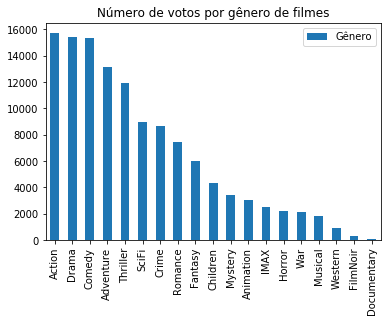

In [27]:
# solução

ax = pd.DataFrame( soma_das_categorias.sort_values( ascending = False ) , columns = ['Gênero'] ).plot.bar()
ax.set_title( 'Número de votos por gênero de filmes' )

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
filmes_generos = pd.DataFrame(generos_ordenados, columns = ['numero_de_filmes'])
filmes_generos = filmes_generos.join( pd.DataFrame(soma_das_categorias) )
filmes_generos.columns = ['numero_de_filmes' , 'quantidade_de_votos' ]
filmes_generos['votos_por_filme'] = ( filmes_generos['quantidade_de_votos']/filmes_generos['numero_de_filmes'] ).round(2)
filmes_generos

,numero_de_filmes,quantidade_de_votos,votos_por_filme
Comedy,181,15330.0,84.70
Drama,166,15445.0,93.04
Action,164,15734.0,95.94
Adventure,132,13117.0,99.37
Thriller,121,11907.0,98.40
SciFi,92,8989.0,97.71
Crime,87,8649.0,99.41
Romance,85,7444.0,87.58
Fantasy,66,5993.0,90.80
Children,47,4331.0,92.15


Text(0.5, 1.0, 'Número de votos por número de filmes nos gêneros')

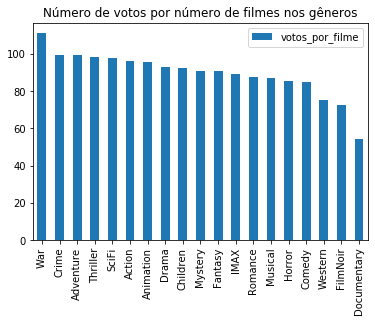

In [29]:
# solução com visualização 
votos_por_filme_serie = filmes_generos.votos_por_filme.sort_values( ascending = False )

ax = pd.DataFrame( votos_por_filme_serie ).plot.bar()
ax.set_title( 'Número de votos por número de filmes nos gêneros' )

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    Filmes de ação em geral possuem mais votos brutos, o que pode ser justificado pela grande quantidade de filmes lançados nesse gênero. Para o gênero *War*, por mais que tenha poucos filmes lançados, possuem muito mais votos por filmes que todos os outros, ou seja, o público desse tipo de filme é muito mais frequênte em votações.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 1.0, 'Boxplot Número de votos dos gêneros Horror e Adventure')

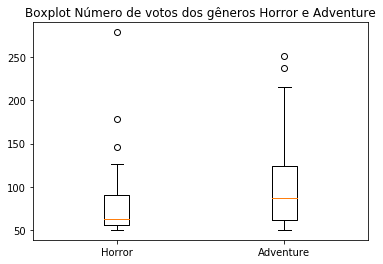

In [30]:
# solução:
import matplotlib.pyplot as plt

filmes_horror = filmes.query( 'Horror == 1' )
filmes_adventure = filmes.query( 'Adventure == 1' )

ax = plt.boxplot( [ filmes_horror['total_de_votos'], filmes_adventure['total_de_votos'] ] , 
                 labels = ['Horror','Adventure'])
plt.title('Boxplot Número de votos dos gêneros Horror e Adventure')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

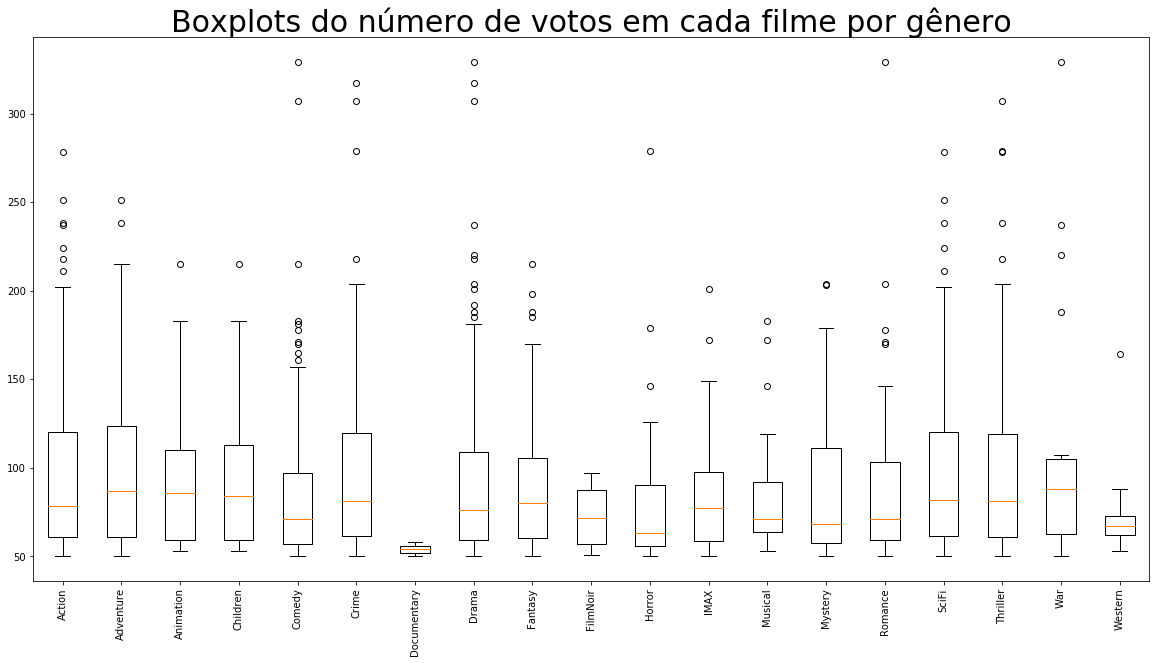

In [31]:
nomes_generos = generos.columns
distribuicoes = []

for gender in nomes_generos:
    distribuicoes.append( filmes.query( gender+' == 1' )['total_de_votos'] )
    

plt.figure(figsize=(20,10))
plt.title('Boxplots do número de votos em cada filme por gênero', fontsize = 30)
plt.xticks(rotation = 90)
ax = plt.boxplot( distribuicoes, labels = nomes_generos )


## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: 

    Utilizando apenas uma análise visual, aparentemente os filmes do gênero Adventure possuem mais votantes e de votos por  filme, o que pode ser causa direta de uma audiência maior. Tendo em vista esses dois fatores, o gênero Adventure parece ser mais rentável.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuiçao do total de votos entre os filmes de Aventura')

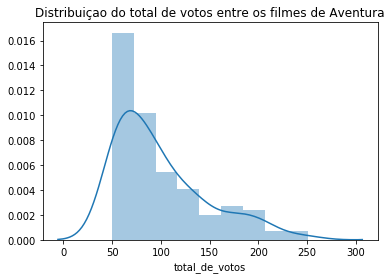

In [32]:
# solucao histograma de aventura
ax = sns.distplot( filmes_adventure['total_de_votos'] )
ax.set_title('Distribuiçao do total de votos entre os filmes de Aventura')

Text(0.5, 1.0, 'Distribuiçao do total de votos entre os filmes de Horror')

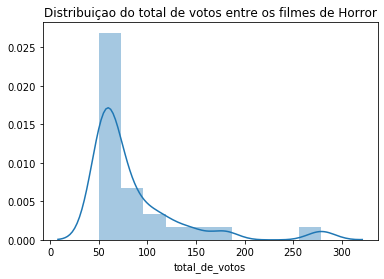

In [33]:
# solucao histograma de horror
ax = sns.distplot( filmes_horror['total_de_votos'] )
ax.set_title('Distribuiçao do total de votos entre os filmes de Horror')

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

## Vamos avaliar a normalidade de uma das duas séries de dados
_, p_value = normaltest( filmes_horror['total_de_votos'] )

print( p_value )

_, p_value = normaltest( filmes_adventure['total_de_votos'] )

print( p_value )

1.2786148884334685e-07
5.987863006199139e-06


A um nível de significância de **5%** rejeitamos a hipótese nula de que os dados provém
de uma distribuição normal, portanto **não podemos realizar testes estatísticos que exigem
normalidade**, como o z-test e o t-test.


Portanto, usaremos o teste **ranksums**, que possui as seguintes Hipóteses:

$ H_0 $ : Os dois dados provém da mesma distribuição

$ H_1 $ : Um dos conjuntos realmente tende a possuir valores maiores que o outro

In [35]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p_value = ranksums( filmes_horror['total_de_votos'], filmes_adventure['total_de_votos'] )
p_value

0.04782366231999856

### Solução (explique sua conclusão):
Encontramos um *P_value* relativamente grande, portanto não negamos a hipótese nula.
Considerando a hipótese nula verdadeira, podemos concluir que qualquer um dos filmes geraria o mesmo resultado
em número de votos e não importaria a escolha. Entretanto, o número de filmes do gênero Horror cadastrado na plataforma
pode ter sido insuficiente para uma análise adequada.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Boxplot das Notas médias dos gêneros Horror e Adventure')

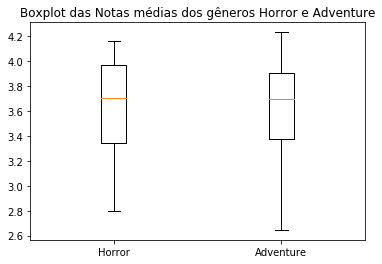

In [36]:
# solução:

ax = plt.boxplot( [ filmes_horror['nota_media'], filmes_adventure['nota_media'] ] , 
                 labels = ['Horror','Adventure'])
plt.title('Boxplot das Notas médias dos gêneros Horror e Adventure')


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
   Analisando visualmente os dois boxplots, os filmes aparentam ser bem semelhantes nas suas distribuições e especialmente na mediana. Entretanto, os filmes de horror parecem ter uma distribuição mais centrada ao torno da mediana, e por isso pode ser uma melhor escolha.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Distribuição das notas médias nos filmes de aventura')

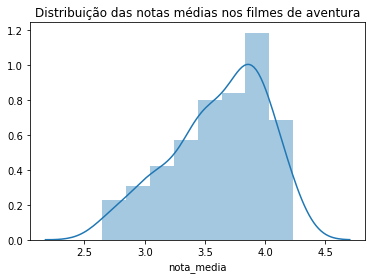

In [37]:
# solucao histograma de aventura
ax = sns.distplot( filmes_adventure['nota_media'] )
ax.set_title('Distribuição das notas médias nos filmes de aventura')

Text(0.5, 1.0, 'Distribuição das notas médias nos filmes de horror')

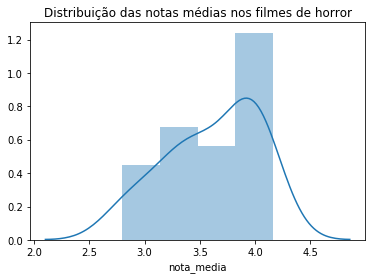

In [38]:
# solucao histograma de horror
ax = sns.distplot( filmes_horror['nota_media'] )
ax.set_title('Distribuição das notas médias nos filmes de horror')

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

## Vamos avaliar a normalidade de uma das duas séries de dados
_, p_value = normaltest( filmes_horror['nota_media'] )

print( p_value )

_, p_value = normaltest( filmes_adventure['nota_media'] )

print( p_value )


0.21186284682483916
0.012835697582553224


Considerando um nível de significância de **1%** podemos concluir que ambos os testes possuem uma **normalidade adequada**
Entretanto, não podemos utilizar o z-test, uma vez que o número de observações para filmes de Horror é **inferior a 30**

In [40]:
# solução com o teste desejado
from statsmodels.stats.weightstats import DescrStatsW

descr_horror = DescrStatsW( filmes_horror['nota_media']  )
descr_asventure = DescrStatsW( filmes_adventure['nota_media'] )

comparacao = descr_horror.get_compare( descr_asventure )
comparacao.summary(use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0048,0.085,-0.057,0.955,-0.173,0.163


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
   Com um P_value de aproximadamente 95%, não rejeitamos a hipótese nula e consideramos que as médias de avaliação dos filmes é a mesma, não havendo, portanto, razão para preferência de algum.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
   Sugiro o gênero Adventure. Por mais que hajam fortes semelhanças entre os dados coletados, o gênero Adventure conseguiu esses resultados com um número maior de amostras, sendo portanto um dado mais seguro. 


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
# solução: calculando os 2 generos mais votados
generos_mais_votados = ['Action', 'Drama'] ## Obtido graficamente nas tabelas acima

In [42]:
votos_por_genero = filmes.query( 'Action == 1 or Drama == 1' )['nota_media']

In [43]:
# solução: encontrando os top 5 filmes desses generos
top_5_id = votos_por_genero.sort_values(ascending = False)[0:5].index

filmes.loc[ top_5_id ].titulo

filmeId
318     Shawshank Redemption, The (1994)
858                Godfather, The (1972)
2959                   Fight Club (1999)
1276               Cool Hand Luke (1967)
1221      Godfather: Part II, The (1974)
Name: titulo, dtype: object

## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solucao
valor_absoluto_corr = filmes.corr()['nota_media'][3:].abs().sort_values()
print( valor_absoluto_corr )
print('Os dois gêneros com menor relação são Documentary e Musical' ) 
print('Os dois gêneros com maior relação são Drama e Comedy' ) 

Documentary    0.003486
Musical        0.008529
Thriller       0.016782
Fantasy        0.020986
Children       0.030360
Horror         0.033877
Animation      0.043071
Western        0.059642
IMAX           0.064931
Romance        0.072002
Adventure      0.079985
FilmNoir       0.081766
War            0.125615
Mystery        0.129914
SciFi          0.136717
Action         0.154089
Crime          0.190220
Comedy         0.256005
Drama          0.277662
Name: nota_media, dtype: float64
Os dois gêneros com menor relação são Documentary e Musical
Os dois gêneros com maior relação são Drama e Comedy


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [45]:
# solucao
valor_absoluto_corr = filmes.corr()['total_de_votos'][3:].abs().sort_values()
print( valor_absoluto_corr )
print('Os dois gêneros com menor relação são Childern e Mystery' ) 
print('Os dois gêneros com maior relação são Adventure e Comedy' ) 

Children       0.001764
Mystery        0.007051
Fantasy        0.009976
IMAX           0.016285
Drama          0.018779
Animation      0.023442
Musical        0.024741
Horror         0.036132
FilmNoir       0.039408
Romance        0.045427
Documentary    0.055010
Western        0.060789
SciFi          0.063802
Action         0.066239
Crime          0.079766
Thriller       0.085525
War            0.087999
Adventure      0.104380
Comedy         0.128527
Name: total_de_votos, dtype: float64
Os dois gêneros com menor relação são Childern e Mystery
Os dois gêneros com maior relação são Adventure e Comedy


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 1.0, 'Relação ano de lançamento e Nota média')

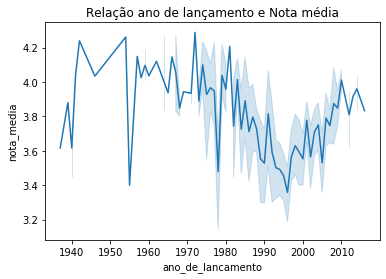

In [46]:
# solucao
ax = sns.lineplot( x = filmes['ano_de_lancamento'], y = filmes['nota_media'] )
ax.set_title("Relação ano de lançamento e Nota média")

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)
filmes.corr()['nota_media'].loc['ano_de_lancamento']

-0.1591455520444448

### Solução (explicação): 
   Por mais que a correlação entre ambos não seja perfeitamente nula, não há razão clara para que a nota media diminua com o ano de lançamento, portanto não podemos estabelecer uma relação de casualidade entre as duas variáveis.
   
   Provavelmente essa correlação foi cusada por inclusão de muitos filmes antigos e clássicos, fazendo parecer que com o passar do tempo a qualidade dos filmes cai.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

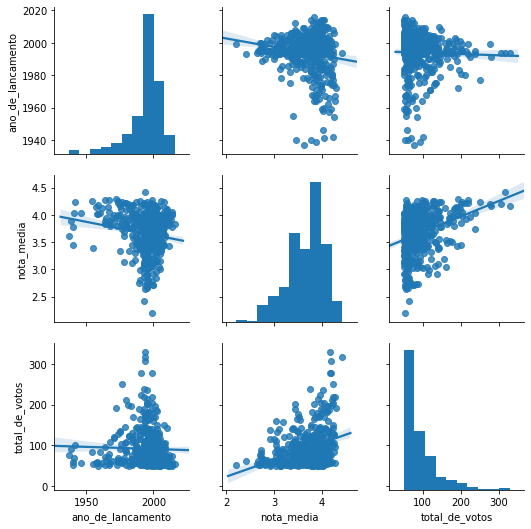

In [48]:
# solução
infos = filmes[ ['ano_de_lancamento', 'nota_media', 'total_de_votos'] ]
ax = sns.pairplot( data = infos ,kind = 'reg')

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

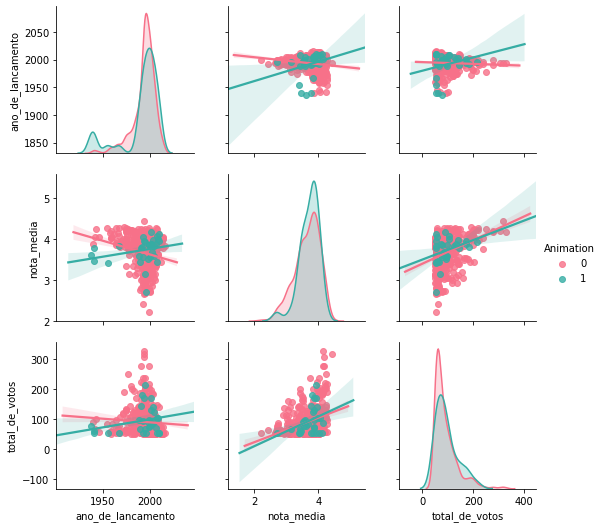

In [49]:
# solução

ax = sns.pairplot( data = filmes, kind = 'reg', hue = 'Animation', 
                  x_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'], 
                  y_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'],
                  palette="husl")

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
   A nota média dos filmes de animação parece subir com o passar dos anos em uma relação aparentemente linear, assim como o total de votos, seguindo o oposto das outras categorias somadas. Com esses resultados, podemos dizer que os filmes de animação tem um aumento de público e de aceitação com o passar dos anos.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

Text(0.5, 0, 'Ano de Lançamento')

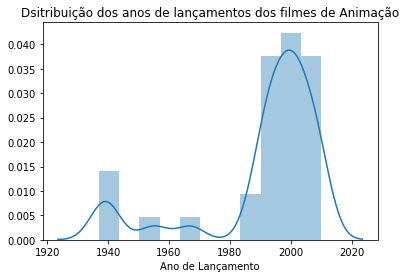

In [50]:
# solução 
## ano de lançamento animações
filmes_animation = filmes.query('Animation == 1')
ax = sns.distplot( filmes_animation['ano_de_lancamento'] )
ax.set_title('Dsitribuição dos anos de lançamentos dos filmes de Animação')
ax.set_xlabel('Ano de Lançamento')

## Pico de lançamento de filmes de Animação:
   Com o gráfico acima, percebemos que a grande quantidade de filmes de Animação foi lançada depois de 1980, fato provavelmente explicado pelo avanço e disseminação da tecnologia de computação gráfica.  

Correlação entre o Total de votos e a média de notas:0.34 


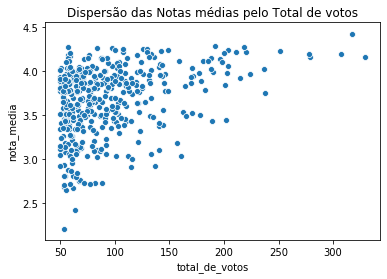

In [51]:
ax = sns.scatterplot( x = filmes['total_de_votos'] , y = filmes['nota_media']  )
ax.set_title( 'Dispersão das Notas médias pelo Total de votos' )

print( 'Correlação entre o Total de votos e a média de notas:%.2f '%filmes.corr().loc['total_de_votos']['nota_media'] )

## Muitos votos e notas altas:
   Aparentemente filmes com maior número de votos tendem a ter notas maiores, isso pode ser notado graficamente com o gráfico de dispersão e com o coeficiente de correlação das duas variáveis, 0.34, relativamente alto. 
   Provavelmente essa relação orcorre por filmes mais bem aceitos terem um público maior e mais participativo nas votações. 